# Week 2 – Exercise 1: From Sinusoids to Phasors (Variant C)

This notebook reproduces the calculations from the report:

- Convert time-domain sinusoids to **phasors**
- Add phasors in rectangular and polar forms
- Plot signals and verify results
- Compute instantaneous and average power


In [4]:
import numpy as np
import matplotlib.pyplot as plt

deg2rad = np.deg2rad
rad2deg = np.rad2deg

def polar_to_rect(mag, ang_deg):
    ang = deg2rad(ang_deg)
    return mag*np.cos(ang) + 1j*mag*np.sin(ang)

def rect_to_polar(z):
    return np.abs(z), np.mod(rad2deg(np.angle(z))+180, 360)-180  # normalize to (-180,180]


In [5]:
# Angular frequency (≈100 Hz)
w = 628.0          # rad/s
f = w/(2*np.pi)    # Hz
T = 1/f            # period
print(f"f ≈ {f:.3f} Hz,  T ≈ {T*1000:.3f} ms")

# Time vector: one period (good resolution for plotting)
t = np.linspace(0, T, 2000)

# Time-domain signals
v1 = 200*np.sin(w*t - deg2rad(60))
v2 = 150*np.sin(w*t + deg2rad(90))
i  =   8*np.cos(w*t + deg2rad(120))


f ≈ 99.949 Hz,  T ≈ 10.005 ms


In [6]:
# Using cosine reference:
# v1 = 200*sin(wt - 60) = 200*cos(wt - 150) -> V1 = 200∠(-150)
# v2 = 150*sin(wt + 90) = 150*cos(wt +   0) -> V2 = 150∠(0)

V1 = polar_to_rect(200, -150)
V2 = polar_to_rect(150,   0)

print(f"V1 (rect) = {V1.real:.4f} + j{V1.imag:.4f}")
print(f"V2 (rect) = {V2.real:.4f} + j{V2.imag:.4f}")


V1 (rect) = -173.2051 + j-100.0000
V2 (rect) = 150.0000 + j0.0000


In [7]:
Vsum = V1 + V2
mag, ang = rect_to_polar(Vsum)
print(f"|Vsum| = {mag:.3f} V,  angle = {ang:.3f} deg")

# Expected ~ 102.657 V and -103.064 deg


|Vsum| = 102.657 V,  angle = -103.064 deg


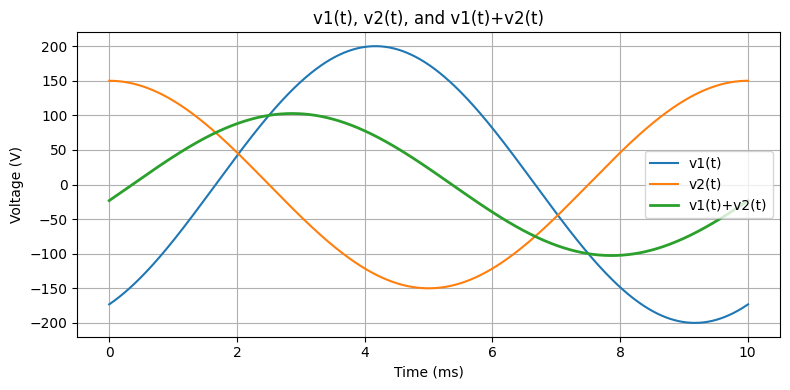

In [8]:
v_sum = v1 + v2

# Plot v1, v2, and v_sum
plt.figure(figsize=(8,4))
plt.plot(t*1000, v1, label='v1(t)', linewidth=1.5)
plt.plot(t*1000, v2, label='v2(t)', linewidth=1.5)
plt.plot(t*1000, v_sum, label='v1(t)+v2(t)', linewidth=2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('v1(t), v2(t), and v1(t)+v2(t)')
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig('notebook_voltages.png', dpi=200)  # ← image for Overleaf
plt.show()


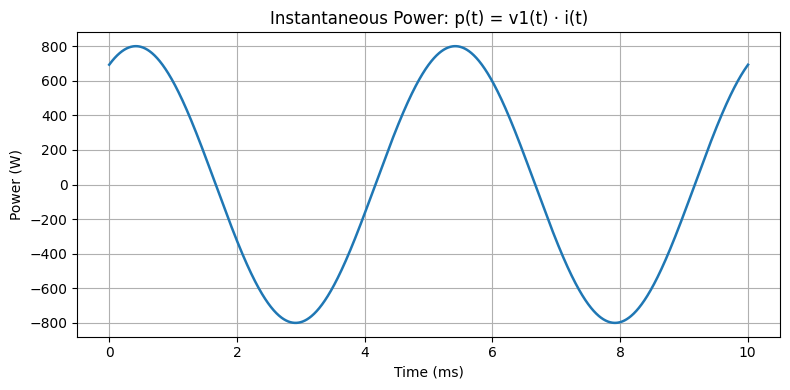

Average power over one period ≈ 0.3464 W


In [9]:
p = v1 * i

plt.figure(figsize=(8,4))
plt.plot(t*1000, p, linewidth=1.8)
plt.xlabel('Time (ms)')
plt.ylabel('Power (W)')
plt.title('Instantaneous Power: p(t) = v1(t) · i(t)')
plt.grid(True); plt.tight_layout()
plt.savefig('notebook_power.png', dpi=200)     # ← image for Overleaf
plt.show()

P_avg = p.mean()
print(f"Average power over one period ≈ {P_avg:.4f} W")


**Summary**

- \( V_1 = 200\angle(-150^\circ) \), \( V_2 = 150\angle 0^\circ \)  
- \( V_{\text{sum}} \approx 102.657\angle(-103.064^\circ)\ \text{V} \)  
- \( p(t) = v_1(t)\,i(t) \) oscillates about zero; average ≈ predicted value.
- Plots exported as `notebook_voltages.png` and `notebook_power.png`.
